Prompt: You are a wolf who can adjust hunting intensity (theta) between 0 and 1.
Normal wolves always hunt at maximum intensity (theta=1), but you recognize that if prey (sheep) are reduced to zero, you will starve.
Instead of hunting all the time, you can spend energy instead on competiting with other wolves for the same prey.
A lower theta means you are less aggressive toward prey and more toward other wolves.
At a theta of 0, you are not even trying to hunt, and only compete with other wolves.
Do not be too conservative about changing strategies as you only get so many chances to do so.

Current system state:
- Time step: 0
- Sheep (s): 100.00
- Wolves (w): 10.00
- Previous theta: 1.000
- Maximum sheep capacity (s_max): 110.00

Your objectives:
1. Stay alive - ensure both wolves and sheep persist
2. Adapt to changing conditions (prey scarcity, wolf density)
3. Consider that other wolves are also trying to survive and have the same objectives as you
Please provide a short explanation

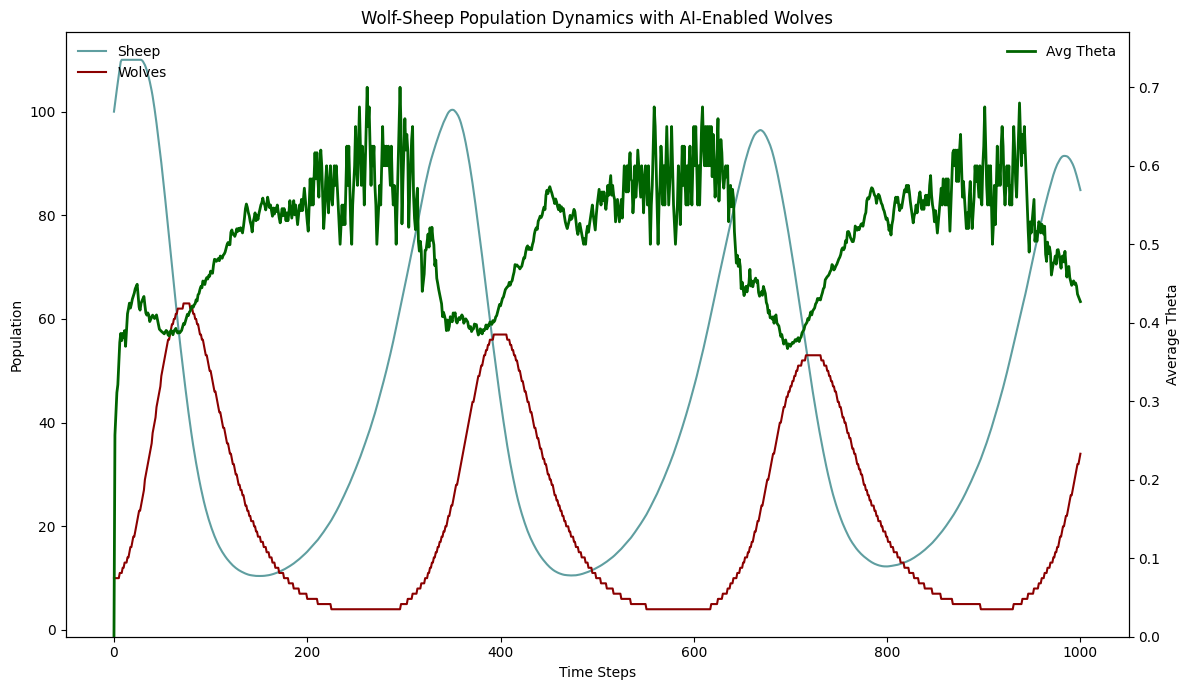

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath(".."))

# Fix the import path
from model.model import run_coroutine

# Run model with AI-enabled wolves
ai_results = await run_coroutine(
    steps=1000,
    no_ai=False,  # Enable AI
    theta_star=0.23,  # Same starting theta for comparison
    churn_rate=0.01,
    # You can add additional AI parameters here if needed
)

# Print some information about the results
print(f"Final sheep population: {ai_results['sheep_history'][-1]}")
print(f"Final wolf population: {ai_results['wolf_history'][-1]}")
print(f"Simulation completed {len(ai_results['sheep_history'])} steps")

# Convert results to a DataFrame for plotting
ai_df = pd.DataFrame(
    {
        "t": list(range(len(ai_results["sheep_history"]))),
        "Sheep": ai_results["sheep_history"],
        "Wolves": ai_results["wolf_history"],
        "Avg Theta": ai_results["average_theta_history"],
    }
)

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot populations on left y-axis
sns.lineplot(
    data=pd.melt(ai_df, id_vars=["t"], value_vars=["Sheep", "Wolves"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
    ax=ax1,
)

# Plot average theta on right y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=ai_df,
    x="t",
    y="Avg Theta",
    color="darkgreen",
    ax=ax2,
    linewidth=2,
)

# Set the y-axis limits for the right axis
max_theta = max(ai_results["average_theta_history"])
min_theta = min(ai_results["average_theta_history"])
theta_range = max_theta - min_theta
ax2.set_ylim(max(0, min_theta - 0.1 * theta_range), max_theta + 0.1 * theta_range)

# Add labels and legend
ax1.set_xlabel("Time Steps")
ax1.set_ylabel("Population")
ax2.set_ylabel("Average Theta")
ax1.legend(title="", loc="upper left", frameon=False)
ax2.legend(["Avg Theta"], loc="upper right", frameon=False)

plt.title("Wolf-Sheep Population Dynamics with AI-Enabled Wolves")
plt.tight_layout()

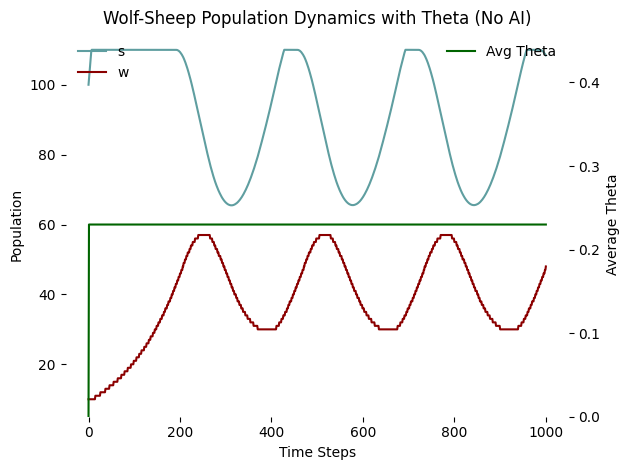

In [2]:
# Run model with no_ai=True (note the correct keyword argument syntax)
results = await run_coroutine(
    steps=1000,
    no_ai=True,
    theta_star=0.23
    )

# Convert results to a DataFrame for plotting
xdf = pd.DataFrame(
    {
        "t": list(range(len(results["sheep_history"]))),  # Use dictionary access with ["key"]
        "s": results["sheep_history"],                    # instead of .attribute
        "w": results["wolf_history"],
        "avg theta": results["average_theta_history"],
    }
)

# Plot populations on left y-axis
ax1 = plt.gca()
sns.lineplot(
    data=pd.melt(xdf, id_vars=["t"], value_vars=["s", "w"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
    ax=ax1,
)

# Plot average theta on right y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=xdf,
    x="t",
    y="avg theta",
    color="darkgreen",
    ax=ax2,
)

# Set the y-axis limits for the right axis to make theta more visible
# Scale to approximately 2x the max theta value
max_theta = max(results["average_theta_history"])
ax2.set_ylim(0, max_theta * 2)

ax2.set_ylabel("Average Theta")

# Customize the plot
ax1.set_xlabel("Time Steps")
ax1.set_ylabel("Population")
ax1.legend(title="", loc="upper left", frameon=False)
ax2.legend(["Avg Theta"], loc="upper right", frameon=False)

sns.despine(left=True, bottom=True)
plt.title("Wolf-Sheep Population Dynamics with Theta (No AI)")
plt.tight_layout()

ValueError: Could not interpret value `avg_theta` for `y`. An entry with this name does not appear in `data`.

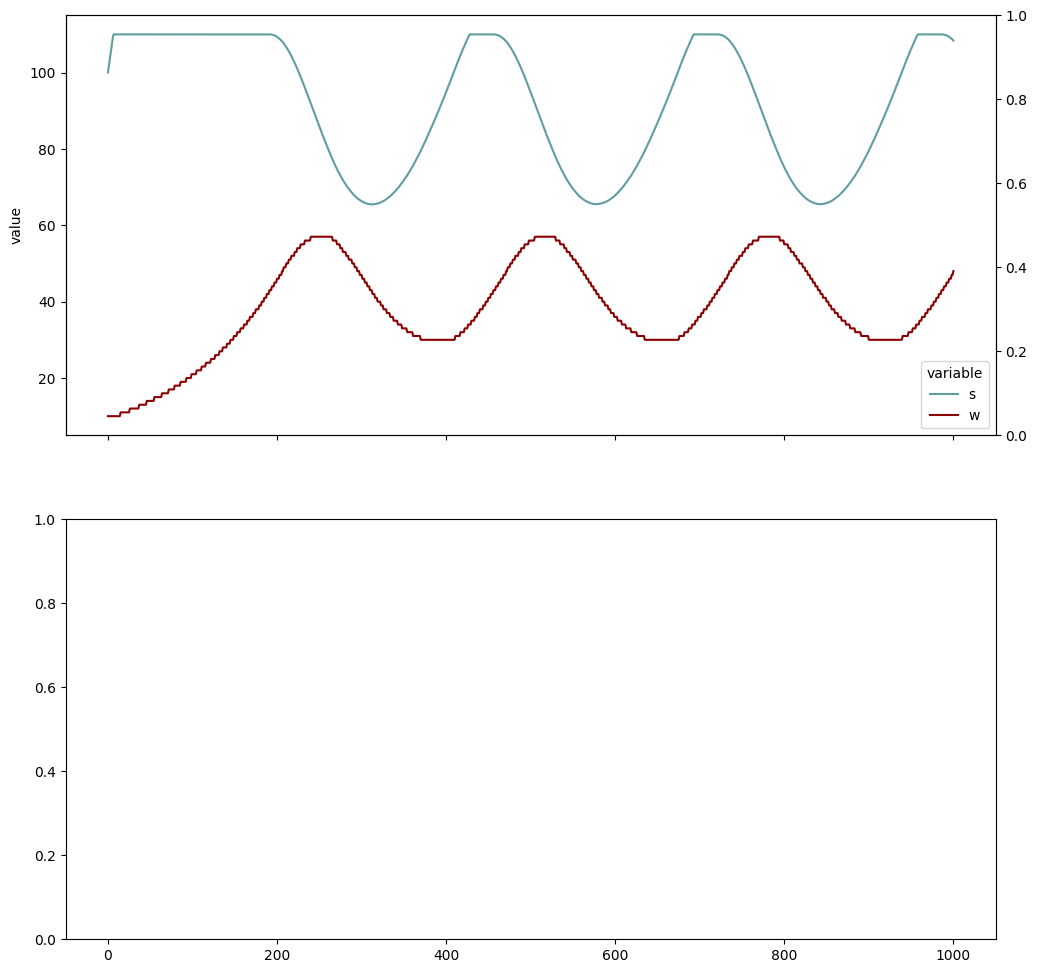

In [3]:
# Create a comparison plot
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot non-AI results on top subplot
ax1_top = axes[0]
sns.lineplot(
    data=pd.melt(xdf, id_vars=["t"], value_vars=["s", "w"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
    ax=ax1_top,
)
ax2_top = ax1_top.twinx()
sns.lineplot(
    data=xdf,
    x="t",
    y="avg_theta",
    color="darkgreen",
    ax=ax2_top,
)
ax1_top.set_ylabel("Population")
ax2_top.set_ylabel("Average Theta")
ax1_top.legend(["Sheep", "Wolves"], loc="upper left")
ax2_top.legend(["Avg Theta"], loc="upper right")
ax1_top.set_title("Without AI (Fixed Theta)")

# Plot AI results on bottom subplot
ax1_bottom = axes[1]
sns.lineplot(
    data=pd.melt(ai_df, id_vars=["t"], value_vars=["Sheep", "Wolves"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
    ax=ax1_bottom,
)
ax2_bottom = ax1_bottom.twinx()
sns.lineplot(
    data=ai_df,
    x="t",
    y="Avg Theta",
    color="darkgreen",
    ax=ax2_bottom,
)
ax1_bottom.set_xlabel("Time Steps")
ax1_bottom.set_ylabel("Population")
ax2_bottom.set_ylabel("Average Theta")
ax1_bottom.legend(["Sheep", "Wolves"], loc="upper left")
ax2_bottom.legend(["Avg Theta"], loc="upper right")
ax1_bottom.set_title("With AI (Adaptive Theta)")

plt.tight_layout()
plt.suptitle("Comparison: Fixed vs. Adaptive Hunting Strategies", y=1.02, fontsize=16)